# Executive Weekly KPI Report
Dataset: Online Retail II

## Goal
Create a weekly executive KPI report including:
- Revenue
- Order count
- Average Order Value (AOV)
- Week-over-week trends


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option("display.max_columns", None)


In [4]:
df = pd.read_csv("../data/raw/online_retail_II.csv", encoding="latin1")
df.head()


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


In [5]:
df.shape


(541910, 8)

In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541910 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Invoice      541910 non-null  object 
 1   StockCode    541910 non-null  object 
 2   Description  540456 non-null  object 
 3   Quantity     541910 non-null  int64  
 4   InvoiceDate  541910 non-null  object 
 5   Price        541910 non-null  float64
 6   Customer ID  406830 non-null  float64
 7   Country      541910 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [7]:
df.head(3)


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom


In [8]:
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])


C:\Users\tapio\AppData\Local\Temp\ipykernel_4700\2994545119.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])


In [9]:
df["InvoiceDate"].dtype


dtype('<M8[ns]')

In [10]:
str(df["InvoiceDate"].dtype)


'datetime64[ns]'

In [11]:
df["Revenue"] = df["Quantity"] * df["Price"]


In [12]:
df[["Invoice", "Quantity", "Price", "Revenue"]].head()


,Invoice,Quantity,Price,Revenue
0,536365,6,2.55,15.30
1,536365,6,3.39,20.34
2,536365,8,2.75,22.00
3,536365,6,3.39,20.34
4,536365,6,3.39,20.34


In [13]:
total_revenue = df["Revenue"].sum()
total_revenue


np.float64(9747765.934)

In [14]:
total_orders = df["Invoice"].nunique()
total_orders


25900

In [15]:
aov = total_revenue / total_orders
aov


np.float64(376.36161907335907)

In [16]:
kpi_summary = pd.DataFrame({
    "Metric": ["Total Revenue", "Total Orders", "Average Order Value"],
    "Value": [total_revenue, total_orders, aov]
})

kpi_summary


,Metric,Value
0,Total Revenue,9.747766e+06
1,Total Orders,2.590000e+04
2,Average Order Value,3.763616e+02


In [17]:
df["Week"] = df["InvoiceDate"].dt.to_period("W").dt.start_time


In [18]:
weekly_kpis = (
    df.groupby("Week")
      .agg(
          Weekly_Revenue=("Revenue", "sum"),
          Weekly_Orders=("Invoice", "nunique")
      )
      .reset_index()
)

weekly_kpis["Weekly_AOV"] = (
    weekly_kpis["Weekly_Revenue"] / weekly_kpis["Weekly_Orders"]
)

weekly_kpis.head()


,Week,Weekly_Revenue,Weekly_Orders,Weekly_AOV
0,2010-11-29,181847.25,513,354.478070
1,2010-12-06,270287.03,717,376.969358
2,2010-12-13,207052.17,573,361.347592
3,2010-12-20,89770.57,222,404.371937
4,2011-01-03,93720.93,320,292.877906


In [19]:
weekly_kpis[["Weekly_Revenue", "Weekly_Orders"]].sum()


Weekly_Revenue    9747765.934
Weekly_Orders       25900.000
dtype: float64

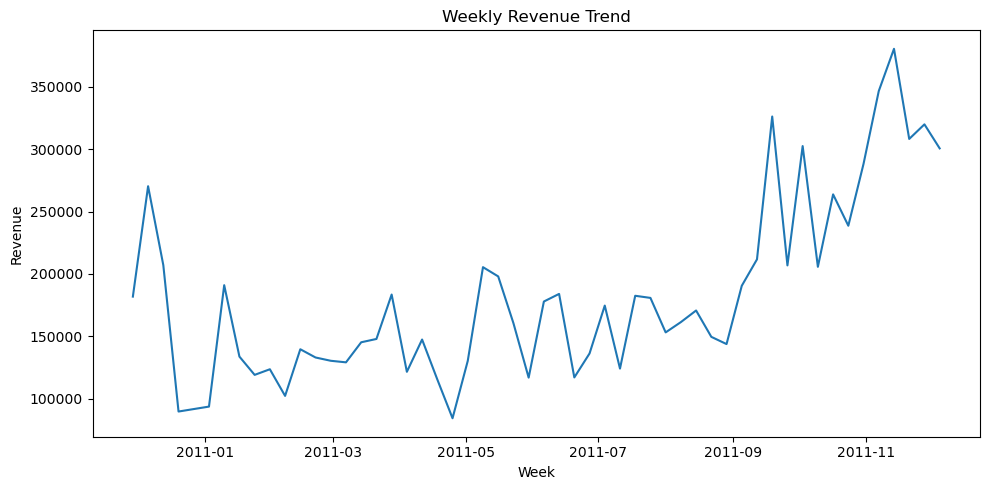

In [20]:
plt.figure(figsize=(10, 5))
plt.plot(weekly_kpis["Week"], weekly_kpis["Weekly_Revenue"])
plt.title("Weekly Revenue Trend")
plt.xlabel("Week")
plt.ylabel("Revenue")
plt.tight_layout()
plt.show()


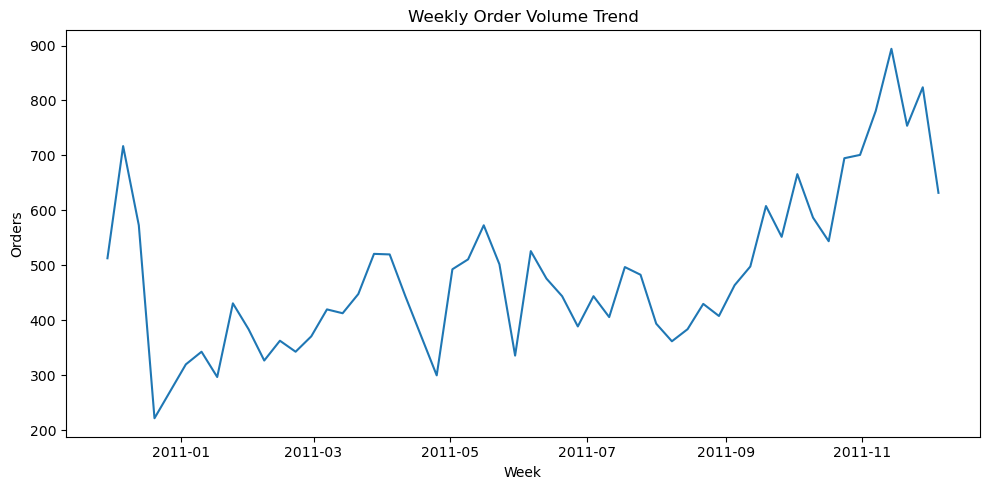

In [21]:
plt.figure(figsize=(10, 5))
plt.plot(weekly_kpis["Week"], weekly_kpis["Weekly_Orders"])
plt.title("Weekly Order Volume Trend")
plt.xlabel("Week")
plt.ylabel("Orders")
plt.tight_layout()
plt.show()


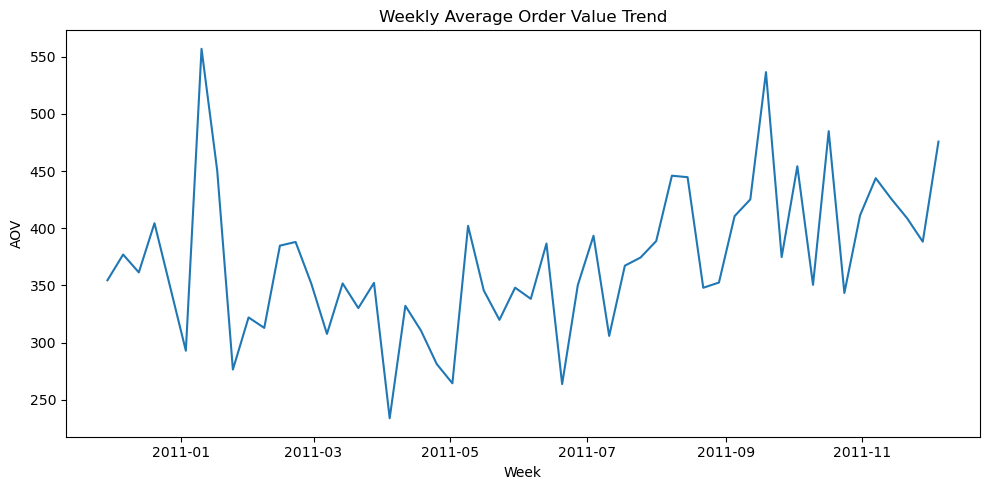

In [22]:
plt.figure(figsize=(10, 5))
plt.plot(weekly_kpis["Week"], weekly_kpis["Weekly_AOV"])
plt.title("Weekly Average Order Value Trend")
plt.xlabel("Week")
plt.ylabel("AOV")
plt.tight_layout()
plt.show()


In [23]:
kpi_summary_export = kpi_summary.copy()
kpi_summary_export["Value"] = kpi_summary_export["Value"].round(2)

weekly_kpis_export = weekly_kpis.copy()
weekly_kpis_export[["Weekly_Revenue", "Weekly_AOV"]] = (
    weekly_kpis_export[["Weekly_Revenue", "Weekly_AOV"]].round(2)
)


In [24]:
output_path = "../outputs/reports/executive_weekly_kpi_report.xlsx"

with pd.ExcelWriter(output_path, engine="openpyxl") as writer:
    kpi_summary_export.to_excel(
        writer,
        sheet_name="KPI Summary",
        index=False
    )
    weekly_kpis_export.to_excel(
        writer,
        sheet_name="Weekly KPIs",
        index=False
    )

output_path


'../outputs/reports/executive_weekly_kpi_report.xlsx'

In [25]:
weekly_kpis_export = weekly_kpis.copy()

weekly_kpis_export["Week"] = weekly_kpis_export["Week"].dt.strftime("%Y-%m-%d")

weekly_kpis_export[["Weekly_Revenue", "Weekly_AOV"]] = (
    weekly_kpis_export[["Weekly_Revenue", "Weekly_AOV"]].round(2)
)


In [26]:
output_path = "../outputs/reports/executive_weekly_kpi_report.xlsx"

with pd.ExcelWriter(output_path, engine="openpyxl") as writer:
    kpi_summary_export.to_excel(writer, sheet_name="KPI Summary", index=False)
    weekly_kpis_export.to_excel(writer, sheet_name="Weekly KPIs", index=False)
